In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

forest_reg = RandomForestRegressor()
tree_reg = DecisionTreeRegressor()
lin_reg_model = LinearRegression()

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in tqdm(range(1, len(X_train),1)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    plt.legend()

In [2]:
# Load Data
FaultPecent = pd.read_csv('data/Mon_Dis_JPCC_CRACK_INDEX.csv')
TST = pd.read_csv('data/TST_All_State_PC.csv')
Hum = pd.read_csv('data/humidity.csv')
Temp = pd.read_csv('data/CLM_VWS_TEMP_ANNUAL.csv')
Traffic = pd.read_csv('data/AnnualTraffic.csv')

In [3]:
TST = TST[['SHRP_ID','STATE_CODE','CONSTRUCTION_NO','REPR_THICKNESS']]
Hum = Hum.drop(['STATE_CODE_EXP'], axis = 1)
Temp = Temp.drop(['STATE_CODE_EXP'], axis = 1)
Traffic = Traffic.drop(['STATE_CODE_EXP'], axis = 1)

FaultPecent = FaultPecent[['SHRP_ID','STATE_CODE','SURVEY_DATE','HPMS16_CRACKING_PERCENT_JPCC']]
# FaultPecent['SURVEY_DATE'] = pd.DatetimeIndex(FaultPecent['SURVEY_DATE']).year
# FaultPecent.rename(columns = {'SURVEY_DATE':'YEAR'}, inplace = True)
# TST = TST[['SHRP_ID','MATL_CODE']]
# Hum = Hum[['SHRP_ID','YEAR','MAX_ANN_HUM_AVG','MIN_ANN_HUM_AVG']]
# Temp = Temp[['SHRP_ID','YEAR','MEAN_ANN_TEMP_AVG']]
# Traffic = Traffic[['SHRP_ID','YEAR','ANNUAL_TRUCK_VOLUME_TREND']]
# FaultPecent = FaultPecent.dropna()
FaultPecent['SURVEY_DATE'] = pd.DatetimeIndex(FaultPecent['SURVEY_DATE']).year
FaultPecent.rename(columns = {'SURVEY_DATE':'YEAR'}, inplace = True)

In [28]:
TST

,SHRP_ID,STATE_CODE,CONSTRUCTION_NO,REPR_THICKNESS
0,708,27,4,7.0
1,708,27,4,5.6
2,6300,27,2,8.0
3,6300,27,2,8.1
4,265,55,2,11.1
...,...,...,...,...
3472,B902,55,8,9.0
3473,B903,55,5,9.2
3474,B907,55,8,9.2
3475,B908,55,5,9.0


In [4]:
Weather = pd.merge(Temp,Hum, on = ['SHRP_ID','STATE_CODE','YEAR','VWS_ID']).drop(['VWS_ID'], axis = 1)
Prepared_data = pd.merge(FaultPecent,Weather, how = 'right',on = ['SHRP_ID','STATE_CODE','YEAR'])
Prepared_data = pd.merge(Prepared_data,Traffic,how = 'right', on = ['SHRP_ID','STATE_CODE','YEAR'])
Prepared_data = pd.merge(Prepared_data,TST,how = 'right', on = ['SHRP_ID','STATE_CODE','CONSTRUCTION_NO'])
Prepared_data = Prepared_data.dropna()

In [5]:
Prepared_data

,SHRP_ID,STATE_CODE,YEAR,HPMS16_CRACKING_PERCENT_JPCC,MEAN_ANN_TEMP_AVG,FREEZE_INDEX_YR,FREEZE_THAW_YR,MAX_ANN_HUM_AVG,MIN_ANN_HUM_AVG,CONSTRUCTION_NO,AADTT_ALL_TRUCKS_TREND,ANNUAL_TRUCK_VOLUME_TREND,REPR_THICKNESS
0,C420,48,1990.0,0.0,17.000000,67.0,56.0,87.0,40.0,1,654.0,238710.0,10.0
1,C420,48,2000.0,6.0,17.799999,39.0,58.0,82.0,39.0,1,1089.0,198198.0,10.0
2,C420,48,1998.0,0.0,18.600000,30.0,47.0,85.0,41.0,1,1297.0,473405.0,10.0
3,C420,48,1996.0,14.0,16.900000,109.0,72.0,81.0,36.0,1,1252.0,458232.0,10.0
4,C420,48,1991.0,0.0,16.799999,22.0,59.0,88.0,42.0,1,866.0,316090.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16962,7776,8,2009.0,0.0,10.000000,277.0,141.0,80.0,32.0,5,2506.0,914690.0,10.7
16971,3017,6,2008.0,3.0,19.299999,0.0,0.0,78.0,38.0,2,823.0,301218.0,8.1
16984,5528,18,1989.0,50.0,9.200000,541.0,70.0,90.0,52.0,1,528.0,192720.0,9.0
17013,5538,18,1989.0,8.0,9.200000,537.0,73.0,90.0,52.0,1,528.0,192720.0,9.0


In [6]:
Prepared_data['SHRP_ID'] = LabelEncoder().fit_transform(Prepared_data['SHRP_ID'])

In [7]:
Prepared_data.to_csv(r'Pavement Distress All Datasets.csv',index = None, header=True)

In [8]:
Target_Labels = Prepared_data['HPMS16_CRACKING_PERCENT_JPCC']
Prepared_data = Prepared_data.drop(['HPMS16_CRACKING_PERCENT_JPCC'], axis = 1)

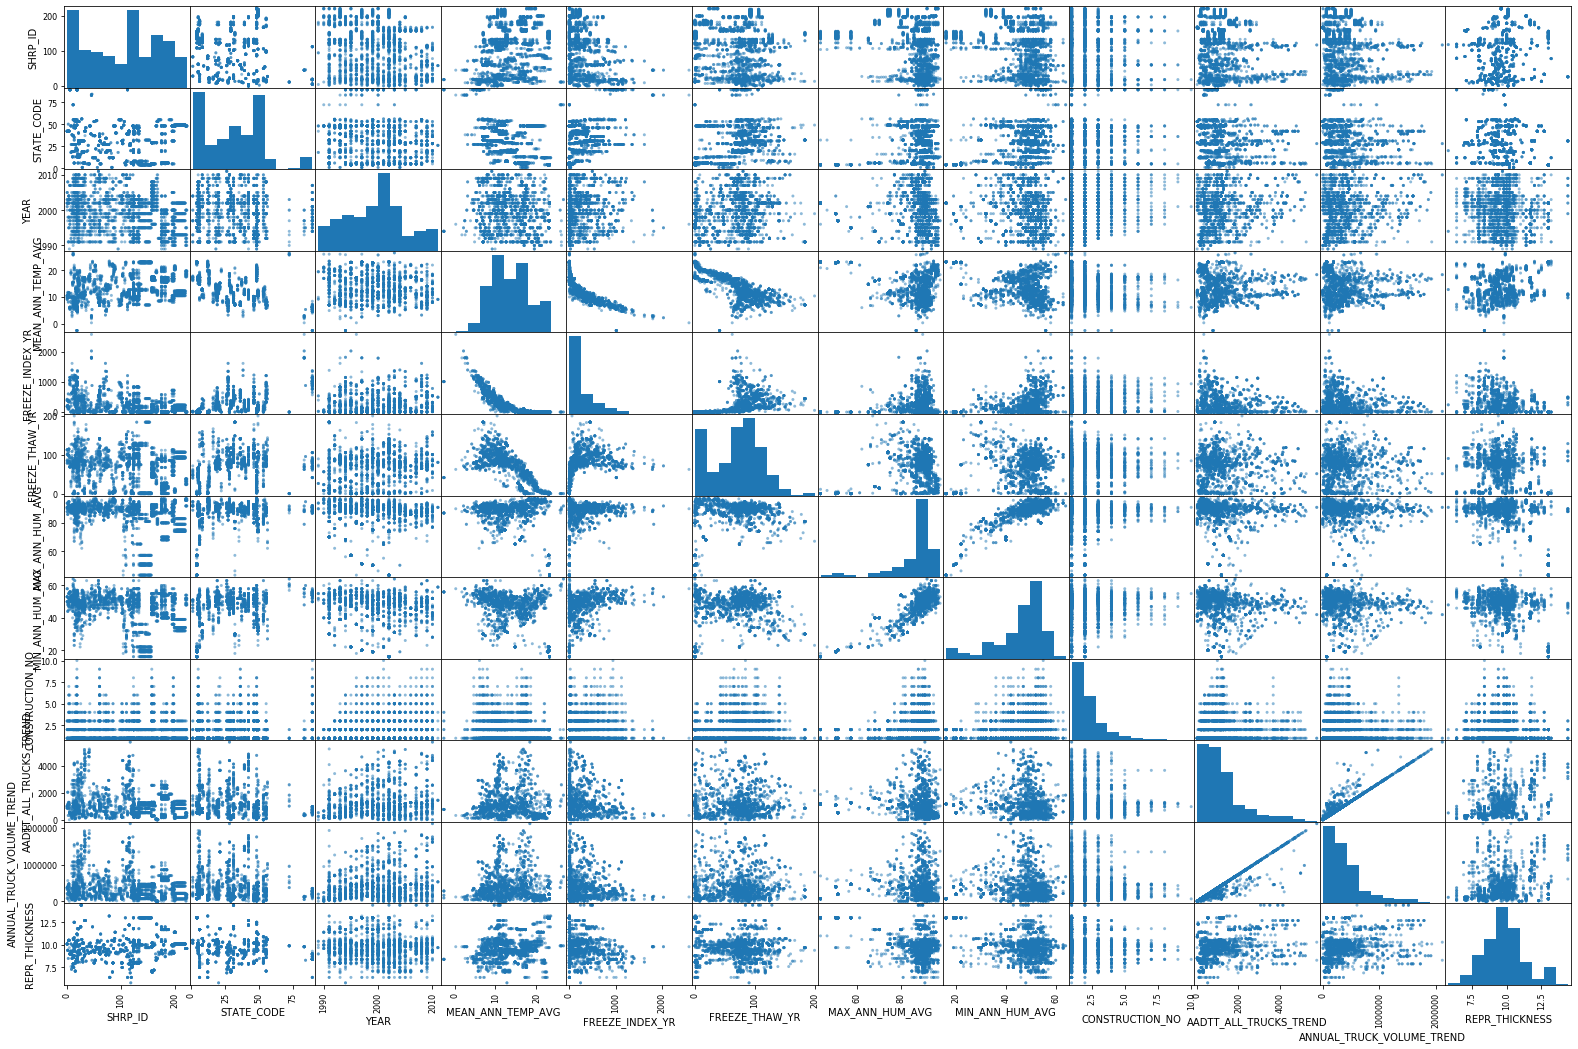

In [9]:
from pandas.plotting import scatter_matrix
attributes = [col for col in Prepared_data.columns]
scat_matrix = scatter_matrix(Prepared_data[attributes], figsize=(27, 18))

for ax in scat_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

In [10]:
Prepared_data = StandardScaler().fit_transform(Prepared_data)

In [11]:
train_test_index = int(np.shape(Prepared_data)[0]*0.7)

In [12]:
tree_reg.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])
forest_reg.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])
lin_reg_model.fit(Prepared_data[0:train_test_index],Target_Labels[0:train_test_index])

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
TreeRegResult = tree_reg.predict(Prepared_data)

In [14]:
ForestRegResult = forest_reg.predict(Prepared_data)

In [15]:
LinearRegResult = lin_reg_model.predict(Prepared_data)

In [16]:
# np.shape(TreeRegResult)[0]
x = np.arange(np.shape(Target_Labels)[0])

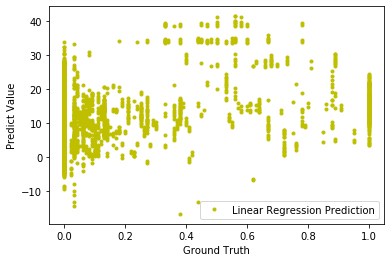

In [30]:
plt.rcParams['figure.figsize'] = (6, 4)
# plt.rcParams['figure.dpi'] = 300
# plt.plot(x,Target_Labels,'r.',label='Ground Truth')
# plt.plot(Target_Labels,TreeRegResult,'b.',label='Decision Tree Prediction')
# plt.plot(Target_Labels,ForestRegResult,'g.',label='Random Forest Prediction')
plt.plot(Target_Labels,LinearRegResult,'y.',label='Linear Regression Prediction')
plt.xlabel('Ground Truth')
plt.ylabel('Predict Value')
plt.legend()
plt.show()

In [18]:
Target_Labels = Target_Labels.map(lambda x: x/100)

Time used: 0.17538714408874512
rmse scores: [0.22421137 0.1950575  0.16582348 0.34059021 0.31252473 0.24064707
 0.13290956 0.26222682 0.3526389  0.42747005]


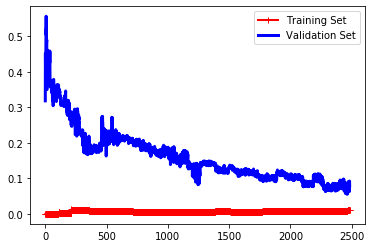

In [35]:
st = time.time()
tree_scores = cross_val_score(tree_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-tree_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(tree_reg, Prepared_data, Target_Labels)

In [20]:
st = time.time()
forest_scores = cross_val_score(forest_reg, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-forest_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)

Time used: 1.0549421310424805
rmse scores: [0.21709645 0.188044   0.09999067 0.24246749 0.21003086 0.26614638
 0.11557346 0.10931286 0.25361917 0.37632608]


In [40]:
Target_Labels.shape

(3107,)

/Users/Crear/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


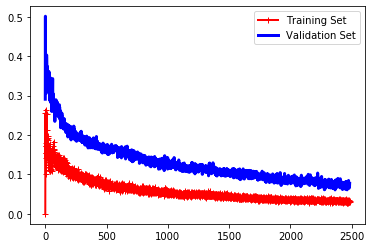

In [36]:
plot_learning_curves(forest_reg, Prepared_data, Target_Labels)

Time used: 0.14438199996948242
rmse scores: [0.30800527 0.13941932 0.23204214 0.17391545 0.28911839 0.33859512
 0.23637976 0.17176022 0.28278534 0.44011811]


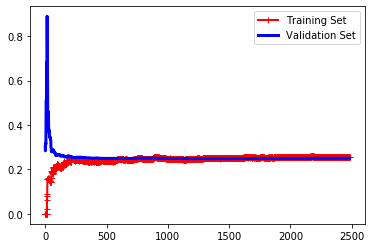

In [37]:
st = time.time()
lin_scores = cross_val_score(lin_reg_model, Prepared_data, Target_Labels,scoring="neg_mean_squared_error", cv=10) 
rmse_scores = np.sqrt(-lin_scores)
print('Time used:',time.time()-st)
print('rmse scores:',rmse_scores)
plot_learning_curves(lin_reg_model, Prepared_data, Target_Labels)